In [13]:
#import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [26]:
a=np.load("mnist.npz")                   #loading the dataset and split it to train and test
test_x=np.array(a["x_test"])
test_y=np.array(a["y_test"])
train_x=np.array(a["x_train"])
train_y=np.array(a["y_train"])
print('X_train: ' + str(train_x.shape)) 
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_x.shape))
print('Y_test:  '  + str(test_y.shape))  #We can see that we have 60000 matrix that have 28 column and 28 row for train and 10000 for test 


X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


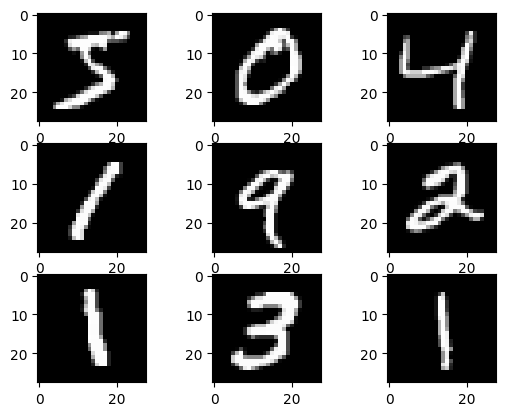

In [3]:
from matplotlib import pyplot                                    #we take a brief look to our data (imshow convrt a matrix to image and cmap is for the color of images)
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_x[i], cmap=pyplot.get_cmap('gray')) 
pyplot.show()



5


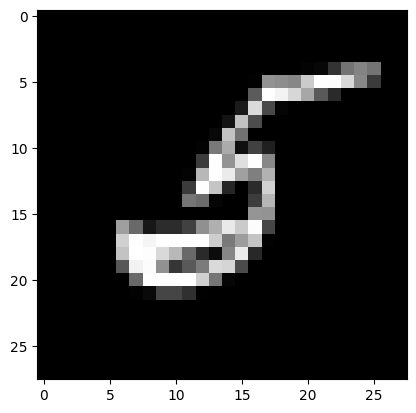

In [4]:
index=1111              #for another  example we can see 3(train[111]) and its label :
img=train_x[index]
print(train_y[index])
plt.gray()
plt.imshow(img)


In [5]:
train_x = train_x.reshape((len(train_x), -1))
test_x= test_x.reshape((len(test_x), -1))

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(train_x,train_y, test_size=0.2, random_state=42)

In [22]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
# Make predictions on the validation set
y_validation_pred = rf_classifier.predict(x_validation)
accuracy = accuracy_score(y_validation, y_validation_pred)
accuracy

0.96925

In [24]:
y_test_pred = rf_classifier.predict(test_x)

# Evaluate the model on the test set
accuracy_test = accuracy_score(test_y, y_test_pred)
precision_test = precision_score(test_y, y_test_pred, average='weighted')
recall_test = recall_score(test_y, y_test_pred, average='weighted')
print("\nEvaluation on the Test Set:")
print(f"Accuracy on the test set: {accuracy_test:.4f}")
print(f"Precision on the test set: {precision_test:.4f}")
print(f"Recall on the test set: {recall_test:.4f}")



Evaluation on the Test Set:
Accuracy on the test set: 0.9686
Precision on the test set: 0.9686
Recall on the test set: 0.9686


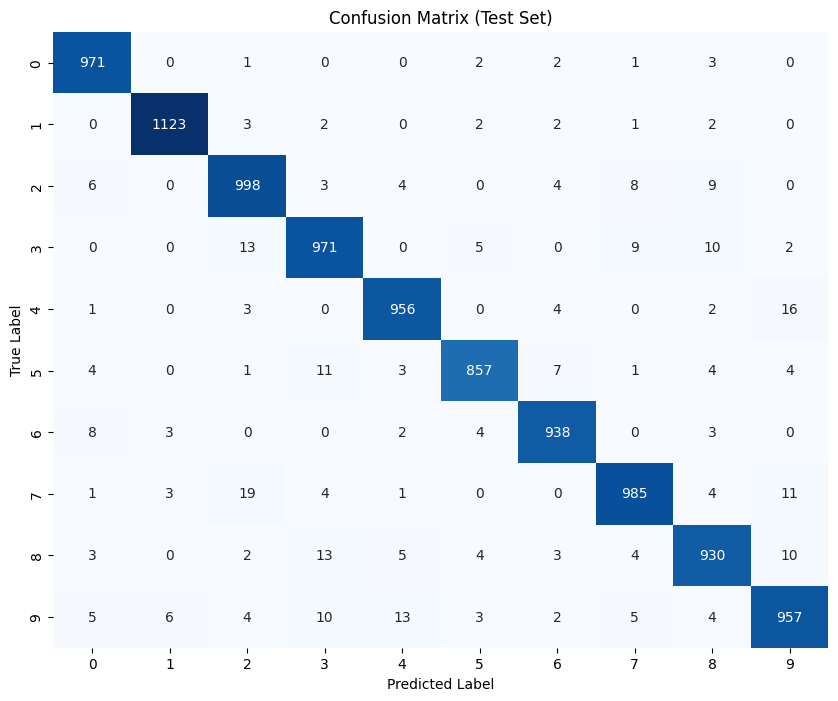

In [25]:
# Calculate confusion matrix for test set
conf_matrix_test = confusion_matrix(test_y, y_test_pred)

# Plot the confusion matrix for test set
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Test Set)")
plt.show()